In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("dow_jones_index.csv")
data

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


In [4]:
data['high'] = data['high'].str.replace('$', '')
data['open'] = data['open'].str.replace('$', '')
data['low'] = data['low'].str.replace('$', '')
data['close'] = data['close'].str.replace('$', '')
data['next_weeks_open'] = data['next_weeks_open'].str.replace('$', '')
data['next_weeks_close'] = data['next_weeks_close'].str.replace('$', '')

C:\Users\HP\AppData\Local\Temp\ipykernel_6940\598260326.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['high'] = data['high'].str.replace('$', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_6940\598260326.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['open'] = data['open'].str.replace('$', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_6940\598260326.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['low'] = data['low'].str.replace('$', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_6940\598260326.p

In [5]:
data['high']=pd.to_numeric(data['high'])
data['open']=pd.to_numeric(data['open'])
data['low']=pd.to_numeric(data['low'])
data['close']=pd.to_numeric(data['close'])
data['next_weeks_open']=pd.to_numeric(data['next_weeks_open'])
data['next_weeks_close']=pd.to_numeric(data['next_weeks_close']) 

In [6]:
data['percent_change_volume_over_last_wk'].fillna(value=0,inplace=True)
data['previous_weeks_volume'].fillna(value=0,inplace=True)

In [7]:
data

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,0.000000,0.0,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.00424,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.52161,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.42098,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400,-1.22500,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    float64
 4   high                                750 non-null    float64
 5   low                                 750 non-null    float64
 6   close                               750 non-null    float64
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  750 non-null    float64
 10  previous_weeks_volume               750 non-null    float64
 11  next_weeks_open                     750 non-n

<AxesSubplot:>

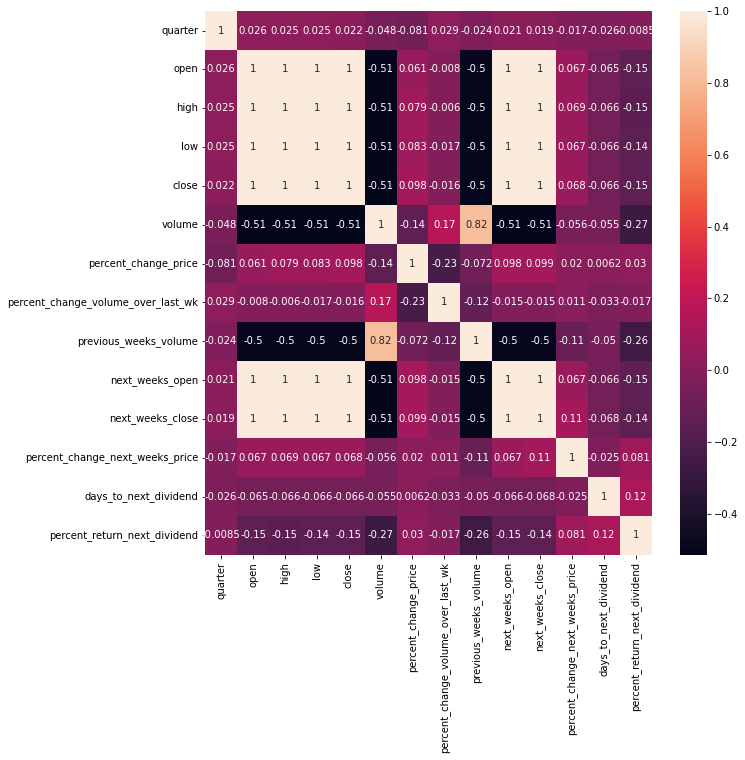

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [13]:
cols=['open','high','low','close','volume','percent_change_price','next_weeks_open','next_weeks_close','days_to_next_dividend' ,'percent_return_next_dividend']
X=data[cols]
y=data['quarter']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
pred=model.predict(X_test)
pred

array([1.54913074, 1.54813425, 1.49749033, 1.54832875, 1.57205104,
       1.57517716, 1.52709849, 1.52365576, 1.49634746, 1.46801631,
       1.55007912, 1.50031549, 1.52780842, 1.48809572, 1.49257709,
       1.42785859, 1.4869727 , 1.49517245, 1.5455281 , 1.6338926 ,
       1.49020232, 1.42692687, 1.52580381, 1.52978727, 1.52162128,
       1.48612595, 1.50104161, 1.55947532, 1.58657317, 1.45367538,
       1.4444433 , 1.44392882, 1.54155301, 1.56212753, 1.59859272,
       1.53719739, 1.45900454, 1.6713445 , 1.46808814, 1.33376232,
       1.48355797, 1.48292294, 1.5028681 , 1.54954379, 1.55624776,
       1.59012436, 1.75127226, 1.56747024, 1.46323332, 1.43074352,
       1.4686594 , 1.45738999, 1.44713124, 1.61041957, 1.52232834,
       1.46044442, 1.50823302, 1.51220186, 1.52237218, 1.51761204,
       1.58537606, 1.53079649, 1.63827155, 1.63449266, 1.59079475,
       1.65187618, 1.47724958, 1.4886941 , 1.59469714, 1.47597925,
       1.64065202, 1.50897175, 1.63079161, 1.5126231 , 1.51115

In [23]:
print('Coefficients: ', model.coef_)

Coefficients:  [ 1.21559843e-03  1.68935129e-02  1.32063229e-02  9.71230820e-02
 -6.90544664e-11 -7.60770675e-03 -1.14063908e-01 -1.42938759e-02
 -1.34534545e-04 -4.45672353e-02]


In [25]:
print('Variance score: {}'.format(model.score(X_test, y_test)))

Variance score: 0.012848113274527173


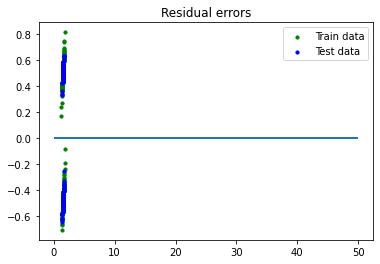

In [26]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()